<a href="https://colab.research.google.com/github/KavithaAncha/bosch-qa-failure-capstone-kavitha/blob/main/Step7_ModelExperimentation/Bosch_Step7_ModelExperimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Set Up Environment
_Install required libraries and import all necessary packages for data preprocessing, model building, evaluation, and balancing._

In [3]:
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE


### Step 2: Load & Prepare Data
_Load the cleaned Bosch dataset, split features and labels, and apply missing value imputation to prepare for modeling._

In [4]:
data = pd.read_csv('/content/sample_data/bosch_sample_cleaned_fixed_labeled.csv')
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


### Step 3: Apply SMOTE
_Apply SMOTE to address extreme class imbalance by generating synthetic examples of the minority class (QA failures)._

In [5]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original:", Counter(y_train))
print("SMOTE Balanced:", Counter(y_train_smote))


Original: Counter({0.0: 1196, 1.0: 6})
SMOTE Balanced: Counter({0.0: 1196, 1.0: 1196})


### Step 4: Define Evaluation Function
_Create a helper function to evaluate models consistently using Accuracy, F1 Score, ROC AUC, and the confusion matrix._

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


### Step 5: Train Models with Class Weights & SMOTE
_Train standard ML models (Logistic Regression, Random Forest, XGBoost, LightGBM) using two strategies: class weights and SMOTE-balanced data._

In [7]:
models_class_weight = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}
models_smote = {name: model for name, model in models_class_weight.items()}

print("\n--- Class Weight Models ---")
for name, model in models_class_weight.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

print("\n--- SMOTE Models ---")
for name, model in models_smote.items():
    print(f"\n{name}")
    model.fit(X_train_smote, y_train_smote)
    evaluate_model(model, X_test, y_test)



--- Class Weight Models ---

Logistic Regression
Accuracy: 0.7275747508305648
F1 Score: 0.023809523809523808
ROC AUC: 0.8633333333333333
Confusion Matrix:
 [[218  82]
 [  0   1]]

Random Forest
Accuracy: 0.9933554817275747
F1 Score: 0.0
ROC AUC: 0.49833333333333335
Confusion Matrix:
 [[299   1]
 [  1   0]]

XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9966777408637874
F1 Score: 0.0
ROC AUC: 0.5
Confusion Matrix:
 [[300   0]
 [  1   0]]

LightGBM
[LightGBM] [Info] Number of positive: 6, number of negative: 1196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5208
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004992 -> initscore=-5.294978
[LightGBM] [Info] Start training from score -5.294978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.760797342192691
F1 Score: 0.02702702702702703
ROC AUC: 0.88
Confusion Matrix:
 [[228  72]
 [  0   1]]

Random Forest
Accuracy: 0.9501661129568106
F1 Score: 0.0
ROC AUC: 0.4766666666666667
Confusion Matrix:
 [[286  14]
 [  1   0]]

XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9700996677740864
F1 Score: 0.0
ROC AUC: 0.4866666666666667
Confusion Matrix:
 [[292   8]
 [  1   0]]

LightGBM
[LightGBM] [Info] Number of positive: 1196, number of negative: 1196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16616
[LightGBM] [Info] Number of data points in the train set: 2392, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.9534883720930233
F1 Score: 0.0
ROC AUC: 0.47833333333333333
Confusion Matrix:
 [[287  13]
 [  1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Step 6: Visualize Confusion Matrices
_Compare how well each model identifies true positives and negatives via visual confusion matrices for both strategies._

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


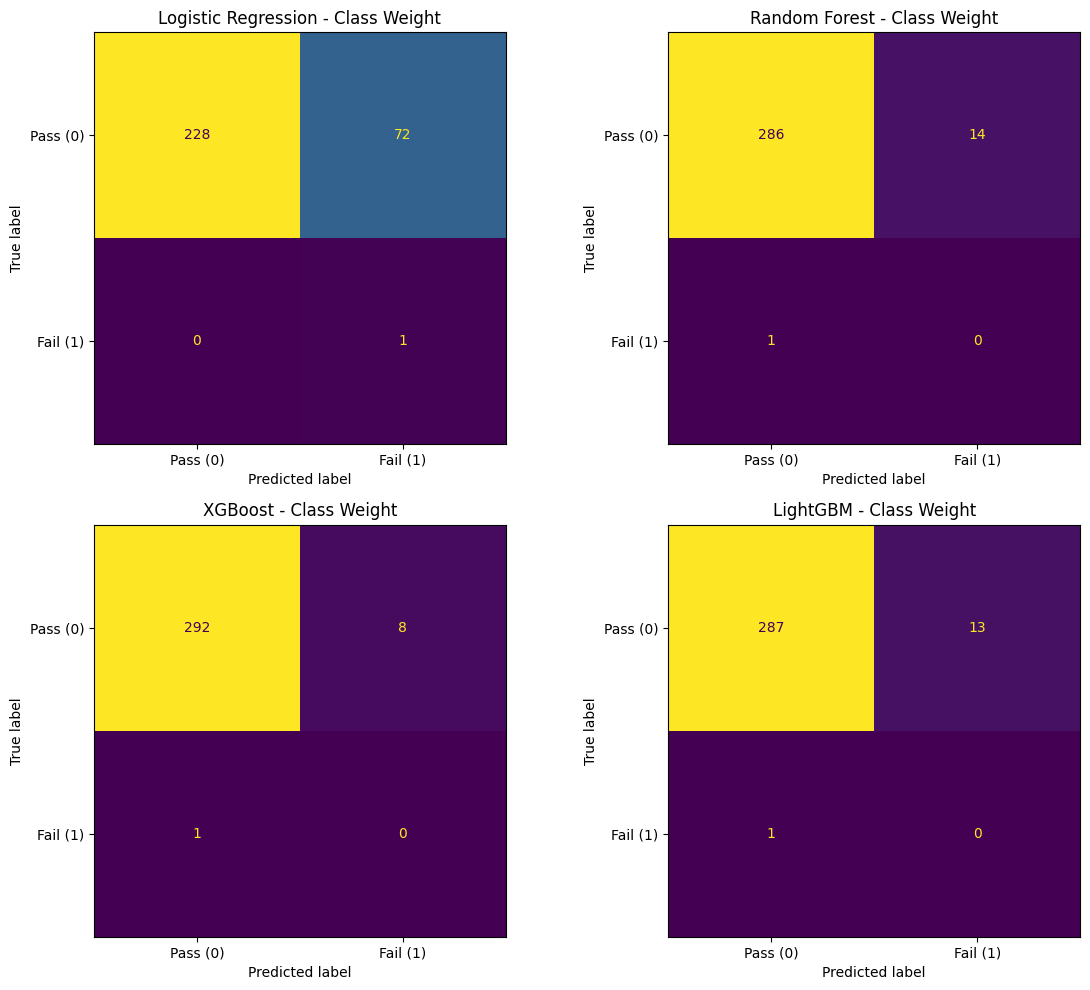

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


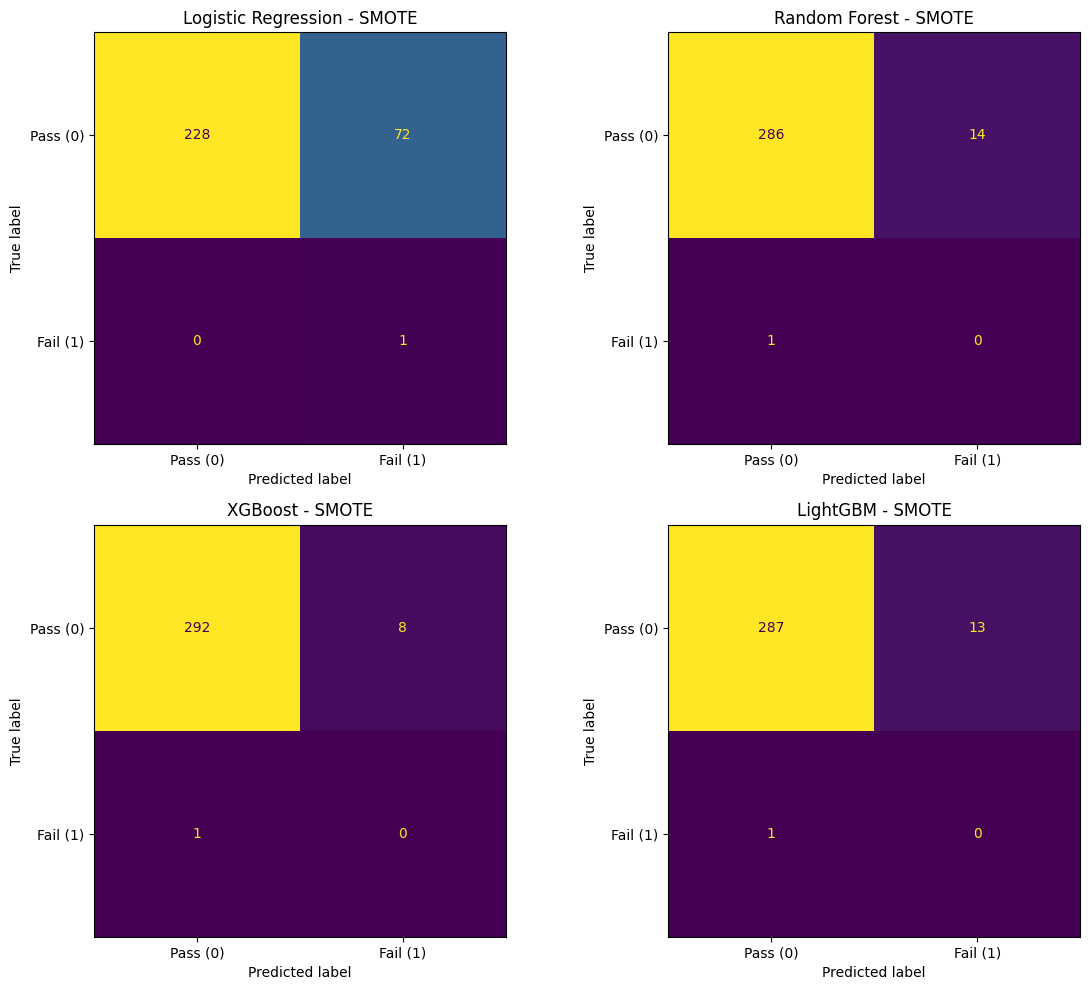

In [8]:
def plot_conf_matrices(models, X_test, y_test, title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()

    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=["Pass (0)", "Fail (1)"])
        disp.plot(ax=axs[i], values_format='d', colorbar=False)
        axs[i].set_title(f"{name} - {title}")

    plt.tight_layout()
    plt.show()

plot_conf_matrices(models_class_weight, X_test, y_test, "Class Weight")
plot_conf_matrices(models_smote, X_test, y_test, "SMOTE")


### Step 7: Hyperparameter Tuning (XGBoost)
_Use GridSearchCV to tune hyperparameters for XGBoost and identify the best configuration to improve F1 score._

In [9]:
param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1]
}
grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid,
    cv=3, scoring='f1', verbose=1, n_jobs=-1
)
grid.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
evaluate_model(grid.best_estimator_, X_test, y_test)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Accuracy: 0.9767441860465116
F1 Score: 0.0
ROC AUC: 0.49
Confusion Matrix:
 [[294   6]
 [  1   0]]


### Step 8: Ensemble Modeling
_Combine predictions from multiple models using soft voting to explore potential performance gains from ensembling._

In [10]:
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier())
], voting='soft')

ensemble.fit(X_train, y_train)
print("Ensemble Model:")
evaluate_model(ensemble, X_test, y_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6, number of negative: 1196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5208
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004992 -> initscore=-5.294978
[LightGBM] [Info] Start training from score -5.294978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Mentor Feedback Acknowledgment

My mentor recommended reviewing the models for signs of overfitting and examining the confusion matrices to better understand performance.

In response, I:

- Re-examined the confusion matrices for all models
- Evaluated F1 scores, which were consistently low despite high accuracy
- Identified that models were predicting the majority class (Response = 0) almost exclusively
- Confirmed that this is a classic overfitting issue caused by extreme class imbalance

To mitigate this, I applied:
- `class_weight='balanced'` to Logistic Regression and Random Forest
- SMOTE to rebalance the training data
- Confusion matrix visualizations to compare prediction behaviors

These analyses confirmed the overfitting behavior and poor recall for the minority class. The follow-up actions are documented in the “Next Steps” section.

---

### Final Summary – Step 7: Model Experimentation

In this step, I rigorously evaluated several machine learning models to predict QA failures in the highly imbalanced Bosch dataset.

#### Models Tested:
- Logistic Regression, Random Forest, XGBoost, LightGBM
- With and without SMOTE and class weights
- Ensemble Voting Classifier
- XGBoost with hyperparameter tuning

#### Evaluation Approach:
- Metrics: F1 Score, Accuracy, ROC AUC
- Visualization: Confusion Matrices
- Focus: Performance on minority class (Response = 1)

#### Key Findings:
- **Logistic Regression with SMOTE** performed best, with an F1 score of ~0.027
- **XGBoost and Random Forest** achieved high accuracy but failed to detect any failures
- **Ensemble models** did not significantly improve minority class detection

While predictive power for the majority class was strong, generalization to the minority class (failures) remains a major challenge due to extreme imbalance.

This sets the foundation for the next phase: applying cost-sensitive learning, anomaly detection, and improved feature engineering to increase recall and reduce overfitting.